In [1]:
#%%writefile AC_2_Codes.py
#Library import statements

from skidl.pyspice import *
#can you say cheeky 
import PySpice as pspice
#becouse it's written by a kiwi you know
import lcapy as kiwi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import YouTubeVideo, display

import traceback

In [2]:
#from DC_1_Codes import get_skidl_spice_ref
#notebook specific loading control statements 
%matplotlib inline
#tool to log notebook internals
#https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information skidl, PySpice,lcapy, sympy, numpy, matplotlib, pandas, scipy

Software,Version
Python,3.7.6 64bit [GCC 7.3.0]
IPython,7.12.0
OS,Linux 4.19.104 microsoft standard x86_64 with debian bullseye sid
skidl,0.0.31.dev0
PySpice,1.4.3
lcapy,0.75.dev0
sympy,1.6.2
numpy,1.18.1
matplotlib,3.3.0
pandas,1.1.4


In [3]:
reset()
net_1=Net('N1')
skidl_SINV=SINEV(ref='1', 
            #transit sim statments
            offset=5,amplitude=5, frequency=5 , delay=5, damping_factor=5,
            #ac sim statments
            ac_magnitude=5, dc_offset=5)

skidl_SINV['p', 'n']+=net_1, gnd
r1=R(value=1@u_Ohm)
r1[1, 2]+=net_1, gnd
circ=generate_netlist()
print(circ)

.title 
V1 N1 0 DC 5V AC 5V 0.0rad SIN(5V 5V 5Hz 5s 5Hz)
R1 N1 0 1Ohm




No errors or warnings found during netlist generation.



In [10]:
sim = circ.simulator()               # Get a simulator for the Circuit object.
waveforms = sim.transient(step_time=0.0001@u_s, end_time=10*.2@u_s) 

In [11]:
time=waveforms.time; time

WaveForm time [0.000000e+00 1.000000e-06 2.000000e-06 ... 1.999828e+00 1.999928e+00
 2.000000e+00]@s

In [12]:
val=waveforms[node(net_1)]; val

WaveForm n1 [5. 5. 5. ... 5. 5. 5.]@V

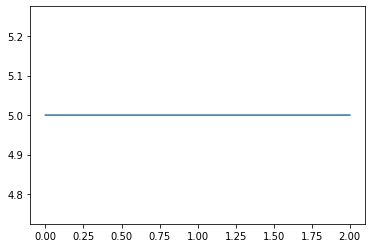

In [13]:
plt.plot(time, val)

In [ ]:
1/5